In [2]:
import mglearn
import pandas as pd
import numpy as np

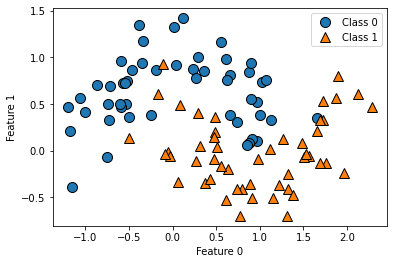

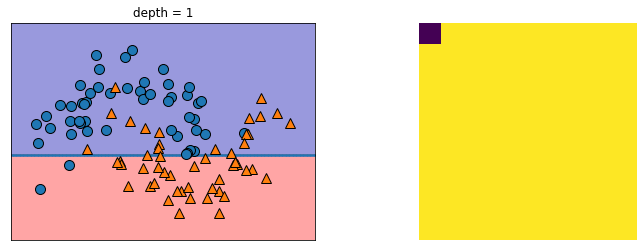

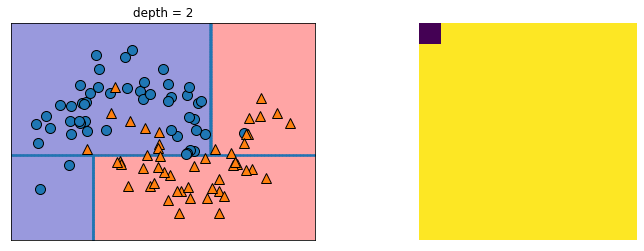

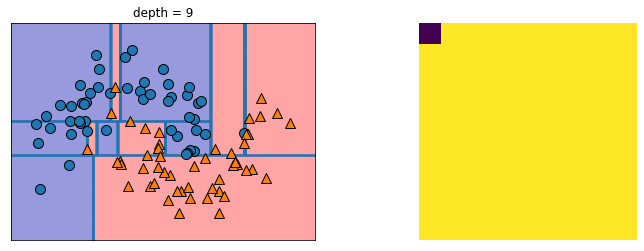

In [3]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=0)

In [7]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
# 과대적합 확인
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8811188811188811


In [62]:
model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, random_state=0)

In [51]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9647887323943662
0.9370629370629371


In [40]:
!conda install python-graphviz

^C


In [52]:
from sklearn.tree import export_graphviz
import graphviz

In [53]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [54]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

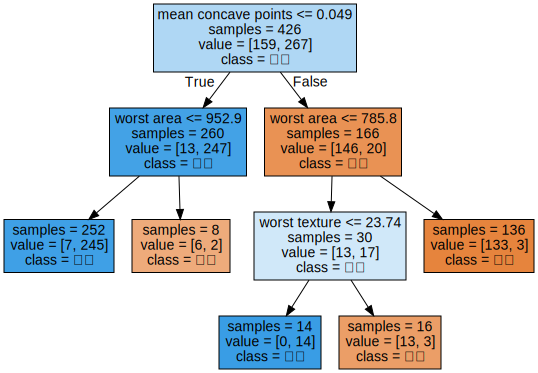

In [55]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [63]:
model.feature_importances_

array([0.        , 0.01684809, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.70522096, 0.        , 0.        ,
       0.        , 0.        , 0.01963773, 0.01689681, 0.01764363,
       0.012139  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05242939, 0.        , 0.11465605, 0.        ,
       0.00983065, 0.03469769, 0.        , 0.        , 0.        ])

In [59]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

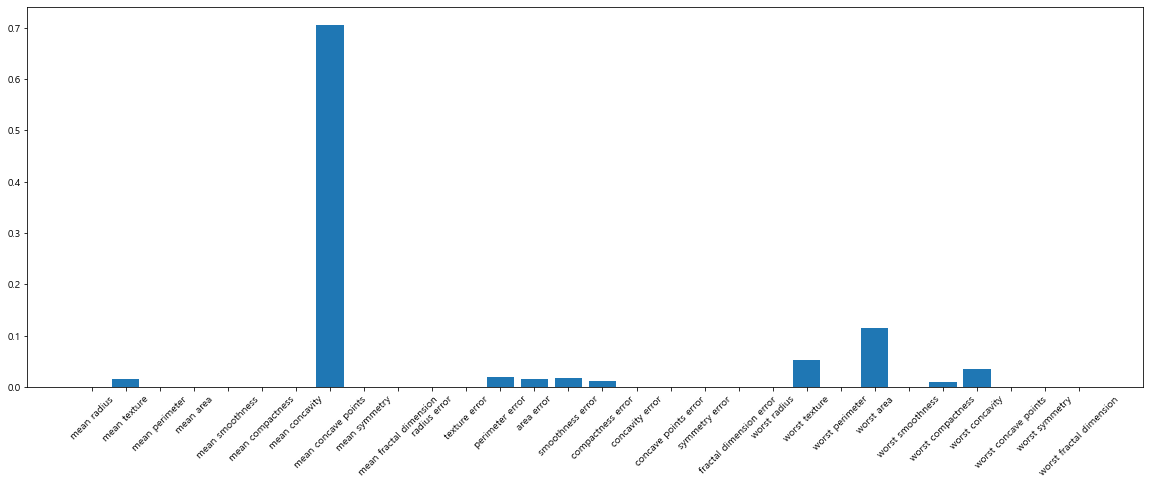

In [70]:
plt.figure(figsize=(20,7))
plt.bar(cancer["feature_names"], model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

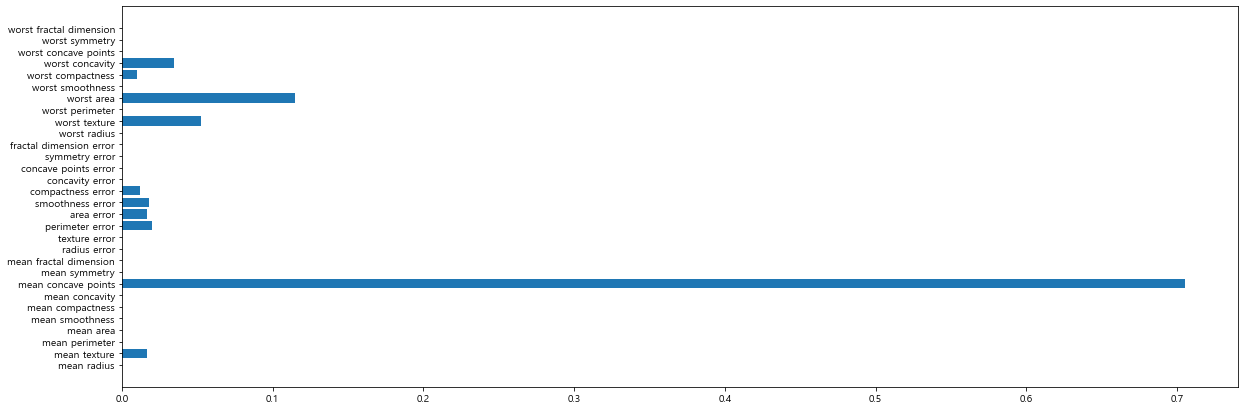

In [79]:
plt.figure(figsize=(20,7))
plt.barh(cancer["feature_names"], model.feature_importances_)
plt.show()